<a href="https://colab.research.google.com/github/arghac14/UndErNsembled/blob/master/Application_(Pima_diabetes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset

In [ ]:
import pandas as pd 
import io 
#colon_df = pd.read_csv(io.BytesIO(uploaded['colon.csv']),index_col=0)
#colon_df = pd.read_csv("https://raw.githubusercontent.com/disha2sinha/Reducing-Imbalanced-dataset-by-Under-sampling-approach-Consensus-Clustering/main/Datasets/colon.csv",index_col=0)
colon_df = pd.read_csv("https://raw.githubusercontent.com/arghac14/UndErNsembled/master/Datasets/pima-diabetes.csv")
colon_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
target = 'Outcome'
maj_val = 0
min_val = 1

In [ ]:
colon_majority_df=colon_df[colon_df[target]==maj_val]
colon_majority_df.shape

(500, 9)

In [ ]:
colon_minority_df=colon_df[colon_df[target]==min_val]
colon_minority_df.shape

(268, 9)

In [ ]:
# colon_df['Class'].replace(to_replace=[['Abnormal'], ['Normal']],value=[0,1],inplace=True)
# colon_df

In [ ]:
colon_majority_df=colon_df[colon_df[target]==maj_val]
colon_majority_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [ ]:
colon_minority_df=colon_df[colon_df[target]==min_val]
colon_minority_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [ ]:
colon_df.isnull().values.any()

False

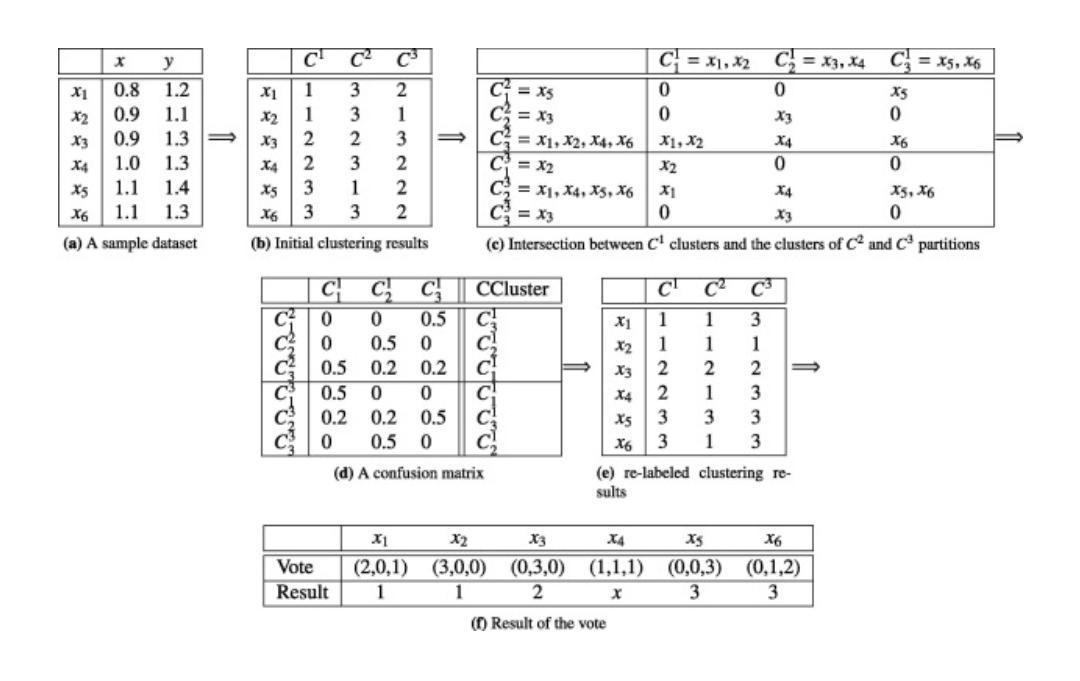

Text(0, 0.5, 'Frequency')

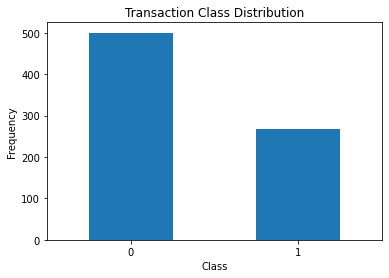

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



count_classes = pd.value_counts(colon_df[target], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")
LABELS = ["0", "1"]
plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
print(colon_minority_df.shape,colon_majority_df.shape)

(268, 9) (500, 9)


In [ ]:
# majority=colon_majority_df['Class']
# colon_majority_df=colon_majority_df.drop('Class',axis=1)
# colon_majority_df.head()

# Different Clustering :

In [ ]:
import pandas as pd
columns=['Kmeans','Kmeans++','Minibatch']
clustering_result=pd.DataFrame(columns=columns)

In [ ]:
num_of_clusters=7

##**KMEANS CLUSTERING**

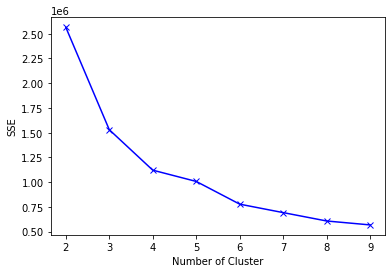

In [ ]:
# Elbow method to find optimal K
from sklearn.cluster import KMeans

sse={}
for k in range(2,10):
  kmeans=KMeans(n_clusters=k,init='random',max_iter=500).fit(colon_majority_df)
  sse[k]=kmeans.inertia_
plt.plot(list(sse.keys()),list(sse.values()),'bx-')
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.savefig("elbow_method.png")

In [ ]:
#Kmeans:
kmeans=KMeans(n_clusters=num_of_clusters,init='random',max_iter=500).fit(colon_majority_df)
clustering_result['Kmeans']=kmeans.labels_

In [ ]:
#import seaborn as sns
#sns.lmplot(x='Top10perc',y='S.F.Ratio',data = colon_majority_df,hue='labels',fit_reg=False)
#sns.pairplot(colon_majority_df[:0],hue='labels')

In [ ]:
partition1 = colon_majority_df
partition1=partition1.reset_index(drop=True)
partition1['cluster_label'] = clustering_result['Kmeans']
partition1 #with cluster labels 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster_label
0,1,85,66,29,0,26.6,0.351,31,0,2
1,1,89,66,23,94,28.1,0.167,21,0,3
2,5,116,74,0,0,25.6,0.201,30,0,4
3,10,115,0,0,0,35.3,0.134,29,0,5
4,4,110,92,0,0,37.6,0.191,30,0,2
...,...,...,...,...,...,...,...,...,...,...
495,9,89,62,0,0,22.5,0.142,33,0,2
496,10,101,76,48,180,32.9,0.171,63,0,1
497,2,122,70,27,0,36.8,0.340,27,0,4
498,5,121,72,23,112,26.2,0.245,30,0,1


# **CLUSTER VISUALIZATION USING PCA FOR REDUCING DIMENSIONS**

In [ ]:
import plotly as py 
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

PCA is an algorithm that is used for dimensionality reduction - meaning, informally, that it can take in a DataFrame with many columns and return a DataFrame with a reduced number of columns that still retains much of the information from the columns of the original DataFrame. The columns of the DataFrame produced from the PCA procedure are called Principal Components. We will use these principal components to help us visualize our clusters in 2-D, and 3-D space, since we cannot easily visualize the data we have in higher dimensions. For example, we can use two principal components to visualize the clusters in 2-D space, or three principal components to visualize the clusters in 3-D space.



In [ ]:
from sklearn.decomposition import PCA #Principal Component Analysis

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(partition1.drop(["cluster_label"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(partition1.drop(["cluster_label"], axis=1)))

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]


In [ ]:
partition1_plot= pd.concat([partition1,PCs_2d,PCs_3d], axis=1, join='inner')

### **CLUSTER VISUALIZATION IN TWO DIMENSIONAL SPACE**

In [ ]:
data=[]
for i in partition1_plot.cluster_label.unique():
  cluster_i=partition1_plot[partition1_plot['cluster_label']==i]
  trace_i = go.Scatter(x = cluster_i["PC1_2d"],y = cluster_i["PC2_2d"],mode = "markers",name = "Cluster "+str(i),text = None)
  data.append(trace_i)

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False))

fig = dict(data = data, layout = layout)

iplot(fig)


### **CLUSTER VISUALIZATION IN THREE DIMENSIONAL SPACE**

In [ ]:
data=[]
for i in partition1_plot.cluster_label.unique():
  cluster_i=partition1_plot[partition1_plot['cluster_label']==i]
  trace_i = go.Scatter3d(x = cluster_i["PC1_3d"],y = cluster_i["PC2_3d"],z=cluster_i['PC3_3d'],mode = "markers",name = "Cluster "+str(i),text = None)
  data.append(trace_i)

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False))

fig = dict(data = data, layout = layout)

iplot(fig)


## **KMEANS++ CLUSTERING**

In [ ]:
#Kmeans++:
kmeans=KMeans(n_clusters=num_of_clusters,init='k-means++',max_iter=500).fit(colon_majority_df)
clustering_result['Kmeans++']=kmeans.labels_

In [ ]:
partition2 = colon_majority_df
partition2=partition2.reset_index(drop=True)
partition2['cluster_label'] = clustering_result['Kmeans++']
partition2 #with cluster labels 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster_label
0,1,85,66,29,0,26.6,0.351,31,0,1
1,1,89,66,23,94,28.1,0.167,21,0,5
2,5,116,74,0,0,25.6,0.201,30,0,4
3,10,115,0,0,0,35.3,0.134,29,0,1
4,4,110,92,0,0,37.6,0.191,30,0,4
...,...,...,...,...,...,...,...,...,...,...
495,9,89,62,0,0,22.5,0.142,33,0,1
496,10,101,76,48,180,32.9,0.171,63,0,0
497,2,122,70,27,0,36.8,0.340,27,0,4
498,5,121,72,23,112,26.2,0.245,30,0,3


In [ ]:
#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(partition2.drop(["cluster_label"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(partition2.drop(["cluster_label"], axis=1)))

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [ ]:
partition2_plot= pd.concat([partition2,PCs_2d,PCs_3d], axis=1, join='inner')

In [ ]:
data=[]
for i in partition2_plot.cluster_label.unique():
  cluster_i=partition1_plot[partition1_plot['cluster_label']==i]
  trace_i = go.Scatter(x = cluster_i["PC1_2d"],y = cluster_i["PC2_2d"],mode = "markers",name = "Cluster "+str(i),text = None)
  data.append(trace_i)

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False))

fig = dict(data = data, layout = layout)

iplot(fig)


In [ ]:
data=[]
for i in partition2_plot.cluster_label.unique():
  cluster_i=partition1_plot[partition2_plot['cluster_label']==i]
  trace_i = go.Scatter3d(x = cluster_i["PC1_3d"],y = cluster_i["PC2_3d"],z=cluster_i['PC3_3d'],mode = "markers",name = "Cluster "+str(i),text = None)
  data.append(trace_i)

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False))

fig = dict(data = data, layout = layout)

iplot(fig)

In [ ]:
!pip install kmodes

In [ ]:
from kmodes.kmodes import KModes


km = KModes(n_clusters=num_of_clusters, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(colon_majority_df)

df_0_centroids=km.cluster_centroids_
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 83, cost: 3033.0
Run 1, iteration: 2/100, moves: 8, cost: 3032.0
Run 1, iteration: 3/100, moves: 0, cost: 3032.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 91, cost: 3022.0
Run 2, iteration: 2/100, moves: 2, cost: 3022.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 200, cost: 3027.0
Run 3, iteration: 2/100, moves: 25, cost: 3026.0
Run 3, iteration: 3/100, moves: 0, cost: 3026.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 60, cost: 3075.0
Run 4, iteration: 2/100, moves: 1, cost: 3075.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 106, cost: 3042.0
Run 5, iteration: 2/100, moves: 1, cost: 3042.0
Best run was num

array([0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 3, 3, 5, 3, 6, 0, 0, 1, 0, 0, 2,
       0, 5, 0, 0, 0, 3, 0, 0, 4, 4, 1, 2, 3, 0, 3, 2, 0, 0, 1, 6, 0, 5,
       0, 0, 0, 5, 2, 0, 5, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 6, 0, 1, 0,
       2, 0, 0, 5, 6, 6, 0, 3, 5, 0, 0, 2, 3, 5, 6, 3, 2, 2, 1, 5, 4, 3,
       0, 3, 2, 6, 1, 0, 2, 3, 1, 0, 4, 6, 2, 6, 2, 0, 1, 1, 2, 5, 0, 0,
       0, 2, 6, 2, 0, 3, 0, 1, 0, 3, 3, 2, 5, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       2, 0, 6, 0, 4, 0, 0, 0, 4, 4, 0, 0, 0, 5, 4, 1, 5, 2, 0, 1, 5, 6,
       0, 2, 0, 1, 6, 2, 0, 0, 0, 0, 3, 2, 1, 2, 0, 0, 0, 2, 1, 3, 2, 5,
       0, 3, 3, 1, 0, 1, 4, 3, 0, 0, 3, 0, 2, 1, 0, 5, 0, 2, 0, 3, 4, 2,
       0, 0, 2, 0, 2, 0, 0, 1, 4, 5, 3, 0, 3, 0, 0, 0, 4, 0, 0, 0, 5, 0,
       2, 3, 3, 3, 3, 0, 1, 5, 1, 1, 2, 2, 5, 0, 1, 0, 5, 0, 0, 6, 0, 3,
       0, 1, 0, 2, 0, 0, 0, 0, 2, 4, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 4, 1,
       0, 3, 0, 2, 0, 0, 3, 6, 4, 2, 0, 0, 1, 1, 6, 1, 2, 0, 0, 0, 3, 0,
       0, 5, 3, 0, 1, 5, 1, 0, 0, 5, 5, 0, 0, 1, 1,

In [ ]:
partition3 = colon_majority_df
partition3=partition3.reset_index(drop=True)
partition3['cluster_label'] = clusters
partition3 #with cluster labels 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster_label
0,1,85,66,29,0,26.6,0.351,31,0,0
1,1,89,66,23,94,28.1,0.167,21,0,0
2,5,116,74,0,0,25.6,0.201,30,0,3
3,10,115,0,0,0,35.3,0.134,29,0,4
4,4,110,92,0,0,37.6,0.191,30,0,0
...,...,...,...,...,...,...,...,...,...,...
495,9,89,62,0,0,22.5,0.142,33,0,0
496,10,101,76,48,180,32.9,0.171,63,0,5
497,2,122,70,27,0,36.8,0.340,27,0,2
498,5,121,72,23,112,26.2,0.245,30,0,0


## **K-prototypes Clustering**

In [ ]:
from kmodes.kprototypes import KPrototypes


kproto = KPrototypes(n_clusters=num_of_clusters, init='Cao', verbose=2)
clusters = kproto.fit_predict(colon_majority_df, categorical=[1])


# Print cluster centroids of the trained model.
clusters


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 131, ncost: 706563.3286852823
Run: 1, iteration: 2/100, moves: 71, ncost: 595595.0391543658
Run: 1, iteration: 3/100, moves: 30, ncost: 548546.2078965778
Run: 1, iteration: 4/100, moves: 18, ncost: 538679.8886348833
Run: 1, iteration: 5/100, moves: 8, ncost: 537848.5052034097
Run: 1, iteration: 6/100, moves: 16, ncost: 535041.3053692122
Run: 1, iteration: 7/100, moves: 16, ncost: 531142.9555560171
Run: 1, iteration: 8/100, moves: 21, ncost: 517075.04227268364
Run: 1, iteration: 9/100, moves: 19, ncost: 504912.86775089026
Run: 1, iteration: 10/100, moves: 21, ncost: 493277.73839160416
Run: 1, iteration: 11/100, moves: 16, ncost: 489506.0380129793
Run: 1, iteration: 12/100, moves: 11, ncost: 486995.98049768957
Run: 1, iteration: 13/100, moves: 10, ncost: 485131.63393373304
Run: 1, iteration: 14/100, moves: 1, ncost: 485085.3191514442
Run: 1, iteration: 15/100, moves: 0, ncost:

array([6, 5, 6, 2, 6, 6, 4, 1, 6, 5, 5, 6, 6, 4, 6, 6, 1, 6, 4, 6, 6, 6,
       6, 6, 2, 4, 4, 6, 3, 6, 5, 6, 5, 2, 6, 5, 6, 6, 4, 5, 5, 3, 6, 6,
       6, 6, 6, 6, 2, 4, 6, 5, 6, 4, 6, 6, 1, 4, 4, 1, 6, 4, 4, 6, 6, 4,
       6, 1, 6, 5, 6, 4, 6, 6, 6, 4, 6, 5, 6, 5, 5, 6, 4, 5, 4, 5, 6, 3,
       6, 6, 4, 3, 6, 6, 5, 6, 6, 1, 6, 0, 5, 5, 4, 6, 5, 3, 6, 6, 6, 6,
       4, 2, 4, 4, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 4, 1, 6, 4,
       6, 6, 6, 5, 2, 1, 4, 4, 6, 0, 4, 4, 6, 4, 6, 6, 4, 1, 6, 0, 3, 6,
       6, 6, 4, 6, 6, 6, 3, 5, 6, 6, 4, 6, 6, 4, 6, 4, 6, 4, 5, 6, 3, 5,
       1, 5, 0, 4, 4, 4, 6, 5, 1, 6, 4, 6, 5, 5, 6, 5, 4, 5, 4, 5, 1, 6,
       1, 6, 4, 6, 4, 6, 4, 3, 2, 5, 4, 6, 6, 6, 5, 4, 2, 4, 6, 6, 6, 4,
       6, 4, 6, 6, 3, 4, 6, 4, 4, 4, 5, 1, 4, 4, 4, 4, 6, 1, 4, 5, 4, 4,
       1, 3, 4, 3, 5, 6, 6, 6, 1, 6, 6, 1, 3, 4, 6, 6, 1, 4, 4, 6, 2, 5,
       2, 4, 4, 6, 6, 6, 6, 6, 6, 4, 5, 4, 5, 4, 5, 1, 2, 5, 6, 4, 4, 4,
       6, 4, 6, 6, 5, 4, 5, 5, 6, 6, 6, 6, 6, 6, 5,

In [ ]:
partition4 = colon_majority_df
partition4=partition4.reset_index(drop=True)
partition4['cluster_label'] = clusters
partition4

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster_label
0,1,85,66,29,0,26.6,0.351,31,0,6
1,1,89,66,23,94,28.1,0.167,21,0,5
2,5,116,74,0,0,25.6,0.201,30,0,6
3,10,115,0,0,0,35.3,0.134,29,0,2
4,4,110,92,0,0,37.6,0.191,30,0,6
...,...,...,...,...,...,...,...,...,...,...
495,9,89,62,0,0,22.5,0.142,33,0,6
496,10,101,76,48,180,32.9,0.171,63,0,1
497,2,122,70,27,0,36.8,0.340,27,0,6
498,5,121,72,23,112,26.2,0.245,30,0,5


## **MINIBATCH KMEANS CLUSTERING**

In [ ]:
from sklearn.cluster import MiniBatchKMeans
mbk = MiniBatchKMeans(init='k-means++', n_clusters=num_of_clusters, batch_size=40, n_init=10, max_no_improvement=10, verbose=0)
mbk.fit(colon_majority_df)
clustering_result['Minibatch']=mbk.labels_

In [ ]:
clustering_result['Minibatch'].values

array([1, 4, 1, 1, 1, 1, 4, 6, 1, 0, 0, 1, 1, 4, 1, 1, 5, 1, 0, 1, 1, 1,
       1, 1, 1, 4, 4, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 4, 0, 0, 6, 1, 4,
       1, 1, 1, 1, 1, 4, 1, 0, 1, 4, 1, 1, 5, 4, 4, 6, 1, 4, 4, 1, 1, 4,
       1, 5, 1, 0, 1, 4, 1, 1, 1, 4, 1, 0, 1, 0, 0, 1, 4, 0, 4, 4, 1, 2,
       1, 1, 4, 6, 1, 1, 0, 1, 1, 5, 1, 2, 0, 0, 4, 1, 0, 6, 1, 1, 1, 1,
       4, 1, 4, 4, 1, 1, 1, 0, 4, 1, 1, 1, 0, 1, 1, 1, 1, 1, 4, 5, 1, 4,
       1, 1, 1, 0, 1, 5, 4, 4, 1, 3, 4, 4, 1, 4, 1, 1, 4, 5, 1, 3, 2, 1,
       1, 1, 4, 1, 1, 1, 2, 0, 1, 1, 4, 1, 1, 4, 1, 4, 1, 4, 0, 1, 2, 0,
       5, 0, 3, 4, 4, 4, 1, 0, 5, 1, 4, 1, 0, 0, 1, 0, 0, 0, 4, 0, 5, 1,
       5, 1, 4, 1, 4, 1, 4, 6, 1, 0, 4, 4, 1, 1, 0, 0, 1, 4, 1, 1, 1, 4,
       1, 4, 1, 1, 2, 4, 1, 4, 0, 4, 0, 5, 4, 4, 4, 4, 1, 5, 4, 0, 4, 4,
       5, 2, 0, 6, 0, 1, 1, 1, 5, 1, 1, 5, 2, 4, 1, 1, 5, 4, 4, 1, 1, 0,
       1, 4, 4, 1, 1, 1, 1, 1, 1, 4, 0, 4, 0, 4, 4, 5, 1, 0, 1, 4, 4, 4,
       1, 4, 1, 1, 0, 4, 0, 0, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
partition5 = colon_majority_df
partition5=partition5.reset_index(drop=True)
partition5['cluster_label'] = clustering_result['Minibatch']
partition5

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster_label
0,1,85,66,29,0,26.6,0.351,31,0,1
1,1,89,66,23,94,28.1,0.167,21,0,4
2,5,116,74,0,0,25.6,0.201,30,0,1
3,10,115,0,0,0,35.3,0.134,29,0,1
4,4,110,92,0,0,37.6,0.191,30,0,1
...,...,...,...,...,...,...,...,...,...,...
495,9,89,62,0,0,22.5,0.142,33,0,1
496,10,101,76,48,180,32.9,0.171,63,0,5
497,2,122,70,27,0,36.8,0.340,27,0,1
498,5,121,72,23,112,26.2,0.245,30,0,0


## **Fuzzy K-Means Clustering**

In [ ]:
!pip install fuzzy-c-means
import numpy as np
from fcmeans import FCM


In [ ]:
fcm = FCM(n_clusters=num_of_clusters)
fcm.fit(colon_majority_df.values)
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(colon_majority_df.values)
fcm_labels

DeviceArray([5, 3, 1, 5, 1, 1, 3, 4, 1, 3, 3, 1, 1, 0, 5, 1, 4, 1, 3, 1,
             1, 1, 1, 5, 5, 0, 0, 5, 6, 5, 3, 1, 3, 5, 5, 3, 5, 1, 0, 3,
             3, 6, 5, 5, 5, 5, 5, 5, 5, 0, 5, 3, 5, 0, 5, 5, 4, 0, 0, 4,
             5, 0, 0, 1, 1, 0, 5, 4, 1, 3, 5, 0, 5, 5, 5, 0, 5, 3, 1, 3,
             3, 5, 0, 3, 0, 3, 1, 6, 1, 5, 0, 6, 5, 5, 3, 1, 5, 4, 1, 6,
             3, 3, 0, 1, 3, 6, 5, 1, 1, 1, 0, 5, 0, 0, 5, 1, 5, 3, 5, 5,
             1, 5, 3, 5, 5, 1, 1, 5, 0, 4, 5, 3, 5, 1, 1, 3, 5, 4, 0, 0,
             5, 2, 0, 0, 1, 0, 5, 5, 3, 4, 1, 2, 6, 1, 5, 1, 0, 5, 5, 5,
             6, 3, 5, 1, 0, 1, 5, 0, 1, 0, 1, 0, 3, 1, 6, 3, 4, 3, 2, 0,
             0, 0, 1, 3, 4, 1, 0, 1, 3, 4, 5, 3, 3, 3, 0, 3, 4, 5, 4, 1,
             0, 1, 0, 1, 0, 6, 5, 3, 0, 5, 1, 5, 3, 3, 5, 0, 5, 1, 5, 0,
             5, 0, 1, 1, 6, 0, 5, 0, 3, 0, 3, 4, 0, 0, 0, 3, 5, 4, 0, 3,
             0, 0, 4, 6, 3, 6, 3, 5, 1, 5, 4, 5, 5, 4, 6, 0, 5, 5, 4, 0,
             0, 5, 5, 4, 5, 0, 0, 1, 5, 1, 1, 5, 1,

In [ ]:
partition6 = colon_majority_df
partition6=partition6.reset_index(drop=True)
partition6['cluster_label'] = fcm_labels
partition6

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster_label
0,1,85,66,29,0,26.6,0.351,31,0,5
1,1,89,66,23,94,28.1,0.167,21,0,3
2,5,116,74,0,0,25.6,0.201,30,0,1
3,10,115,0,0,0,35.3,0.134,29,0,5
4,4,110,92,0,0,37.6,0.191,30,0,1
...,...,...,...,...,...,...,...,...,...,...
495,9,89,62,0,0,22.5,0.142,33,0,5
496,10,101,76,48,180,32.9,0.171,63,0,4
497,2,122,70,27,0,36.8,0.340,27,0,1
498,5,121,72,23,112,26.2,0.245,30,0,3


In [ ]:
partition1, partition2, partition3, partition4,partition5,partition6

(     Pregnancies  Glucose  BloodPressure  ...  Age  Outcome  cluster_label
 0              1       85             66  ...   31        0              2
 1              1       89             66  ...   21        0              3
 2              5      116             74  ...   30        0              4
 3             10      115              0  ...   29        0              5
 4              4      110             92  ...   30        0              2
 ..           ...      ...            ...  ...  ...      ...            ...
 495            9       89             62  ...   33        0              2
 496           10      101             76  ...   63        0              1
 497            2      122             70  ...   27        0              4
 498            5      121             72  ...   30        0              1
 499            1       93             70  ...   23        0              2
 
 [500 rows x 10 columns],
      Pregnancies  Glucose  BloodPressure  ...  Age  Outcome

In [ ]:
c = 0
for i in range(len(partition1.cluster_label)):
  print(partition1.cluster_label[i], partition2.cluster_label[i], partition3.cluster_label[i],partition4.cluster_label[i],partition5.cluster_label[i],partition6.cluster_label[i])
  #if partition1.cluster_label[i]==partition2.cluster_label[i]:
    #c+=1

2 1 0 6 1 5
3 5 0 5 4 3
4 4 3 6 1 1
5 1 4 2 1 5
2 4 0 6 1 1
4 4 0 6 1 1
3 5 0 4 4 3
6 0 0 1 6 4
2 4 0 6 1 1
1 3 0 5 0 3
1 3 0 5 0 3
4 4 3 6 1 1
2 4 3 6 1 1
3 5 5 4 4 0
2 1 3 6 1 5
4 4 6 6 1 1
1 0 0 1 5 4
4 4 0 6 1 1
3 3 1 4 0 3
4 4 0 6 1 1
2 4 0 6 1 1
4 4 2 6 1 1
4 4 0 6 1 1
2 1 5 6 1 5
5 1 0 2 1 5
3 5 0 4 4 0
3 5 0 4 4 0
2 1 3 6 1 5
6 6 0 3 2 6
2 1 0 6 1 5
1 3 4 5 0 3
4 4 4 6 1 1
1 3 1 5 0 3
5 1 2 2 1 5
2 1 3 6 1 5
1 3 0 5 0 3
2 1 3 6 1 5
4 4 2 6 1 1
3 5 0 4 4 0
1 3 0 5 0 3
1 3 1 5 0 3
6 6 6 3 6 6
2 1 0 6 1 5
2 1 5 6 4 5
2 1 0 6 1 5
2 1 0 6 1 5
2 1 0 6 1 5
2 1 5 6 1 5
5 1 2 2 1 5
3 5 0 4 4 0
2 1 5 6 1 5
1 3 2 5 0 3
2 1 0 6 1 5
3 5 2 4 4 0
2 1 0 6 1 5
2 1 0 6 1 5
1 0 0 1 5 4
3 5 0 4 4 0
3 5 2 4 4 0
6 0 0 1 6 4
2 1 0 6 1 5
3 5 0 4 4 0
3 5 6 4 4 0
4 4 0 6 1 1
4 4 1 6 1 1
3 5 0 4 4 0
2 1 2 6 1 5
1 0 0 1 5 4
2 4 0 6 1 1
1 3 5 5 0 3
2 1 6 6 1 5
3 5 6 4 4 0
2 1 0 6 1 5
2 1 3 6 1 5
2 1 5 6 1 5
3 5 0 4 4 0
2 1 0 6 1 5
3 3 2 5 0 3
4 4 3 6 1 1
1 3 5 5 0 3
3 3 6 5 0 3
2 1 3 6 1 5
3 5 2 4 4 0
1 3 

## **Finding the 3 Best algorithms for our model:**

In [ ]:
from sklearn.metrics import davies_bouldin_score
print("Kmeans (partition 1): ",davies_bouldin_score(colon_majority_df, partition1.cluster_label))
print("Kmeans++ (partition 2): ",davies_bouldin_score(colon_majority_df, partition2.cluster_label))
print("KModes (partition 3): ",davies_bouldin_score(colon_majority_df, partition3.cluster_label))
print("K-prototypes(partition 4): ",davies_bouldin_score(colon_majority_df, partition4.cluster_label))
print("Minibatch Kmeans (partition 5): ",davies_bouldin_score(colon_majority_df, partition5.cluster_label))
print("Fuzzy K-means(partition 6): ",davies_bouldin_score(colon_majority_df, partition6.cluster_label))

Kmeans (partition 1):  0.9053928820550031
Kmeans++ (partition 2):  0.9990704965175017
KModes (partition 3):  11.218636750442439
K-prototypes(partition 4):  0.8565564328935757
Minibatch Kmeans (partition 5):  0.9044098636676213
Fuzzy K-means(partition 6):  0.9904746219927499


In [ ]:
partitionA, partitionB, partitionC = partition1, partition2, partition5

In [ ]:
partitionA, partitionB, partitionC = partition1, partition2, partition5
colon_majority = colon_majority_df
colon_majority['C1'] = partitionA.cluster_label.values
colon_majority['C2'] = partitionB.cluster_label.values
colon_majority['C3'] = partitionC.cluster_label.values
colon_majority

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,C1,C2,C3
1,1,85,66,29,0,26.6,0.351,31,0,2,1,1
3,1,89,66,23,94,28.1,0.167,21,0,3,5,4
5,5,116,74,0,0,25.6,0.201,30,0,4,4,1
7,10,115,0,0,0,35.3,0.134,29,0,5,1,1
10,4,110,92,0,0,37.6,0.191,30,0,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0,2,1,1
763,10,101,76,48,180,32.9,0.171,63,0,1,0,5
764,2,122,70,27,0,36.8,0.340,27,0,4,4,1
765,5,121,72,23,112,26.2,0.245,30,0,1,3,0


In [ ]:
#colon_majority.to_csv('colon_majority.csv', index = False)
#from google.colab import files
#files.download("colon_majority.csv")

In [ ]:
colon_majority['index'] = range(0, len(colon_majority))

colon_majority=colon_majority.reset_index(drop=False)
colon_majority.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,level_0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,C1,C2,C3,index
0,1,1,85,66,29,0,26.6,0.351,31,0,2,1,1,0
1,3,1,89,66,23,94,28.1,0.167,21,0,3,5,4,1
2,5,5,116,74,0,0,25.6,0.201,30,0,4,4,1,2
3,7,10,115,0,0,0,35.3,0.134,29,0,5,1,1,3
4,10,4,110,92,0,0,37.6,0.191,30,0,2,4,1,4


In [ ]:
colon_majority=colon_majority.drop(['level_0'], axis=1)
colon_majority.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,C1,C2,C3,index
0,1,85,66,29,0,26.6,0.351,31,0,2,1,1,0
1,1,89,66,23,94,28.1,0.167,21,0,3,5,4,1
2,5,116,74,0,0,25.6,0.201,30,0,4,4,1,2
3,10,115,0,0,0,35.3,0.134,29,0,5,1,1,3
4,4,110,92,0,0,37.6,0.191,30,0,2,4,1,4


In [ ]:
clustering_result=colon_majority[['index','C1','C2','C3']]
clustering_result.rename(columns={'index': 'Datapoint(x)'}, inplace=True)
clustering_result

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Datapoint(x),C1,C2,C3
0,0,2,1,1
1,1,3,5,4
2,2,4,4,1
3,3,5,1,1
4,4,2,4,1
...,...,...,...,...
495,495,2,1,1
496,496,1,0,5
497,497,4,4,1
498,498,1,3,0


In [ ]:

num_of_clusters=7
C1_datapoints={}
C2_datapoints={}
C3_datapoints={}
def clusters(dictionary,clustername):
  for i in clustering_result.index:
    if clustering_result.loc[i,clustername] not in dictionary.keys():
      dictionary[clustering_result.loc[i,clustername]]=[clustering_result.loc[i,'Datapoint(x)']]
    else:
      dictionary[clustering_result.loc[i,clustername]].append(clustering_result.loc[i,'Datapoint(x)'])
  return dictionary

C1_datapoints=clusters(C1_datapoints,'C1')
C2_datapoints=clusters(C2_datapoints,'C2')
C3_datapoints=clusters(C3_datapoints,'C3')
print("C1 clusters :",C1_datapoints)
print("C3 clusters :",C3_datapoints)


def common_member(list1,list2):
  set1=set(list1)
  set2=set(list2)
  return len(set1.intersection(set2))

# def union(list1, list2):
#   l = list1 + list2
#   return len(set(l))


contingency_matrix1=[]
for i in range(7):
  common=[]
  for j in range(7):
    common_element=common_member(C3_datapoints[i],C1_datapoints[j])
    common.append(common_element)
  contingency_matrix1.append(common)
contingency_df1=pd.DataFrame(contingency_matrix1,index=['C30','C31','C32','C33','C34','C35','C36'],columns=['C10','C11','C12','C13','C14','C15','C16'])
contingency_df1

C1 clusters : {2: [0, 4, 8, 12, 14, 20, 23, 27, 29, 34, 36, 42, 43, 44, 45, 46, 47, 50, 52, 54, 55, 60, 66, 68, 70, 72, 73, 74, 76, 81, 89, 92, 93, 96, 98, 106, 109, 114, 116, 118, 119, 121, 123, 124, 125, 127, 130, 132, 139, 140, 146, 147, 153, 154, 157, 158, 159, 162, 166, 170, 190, 197, 203, 209, 211, 216, 218, 220, 223, 226, 236, 247, 249, 251, 252, 256, 257, 261, 268, 271, 272, 286, 288, 291, 296, 298, 308, 311, 312, 315, 319, 321, 322, 327, 328, 331, 337, 341, 343, 347, 348, 355, 361, 363, 364, 367, 369, 372, 380, 382, 383, 384, 389, 392, 400, 401, 403, 405, 408, 413, 415, 417, 418, 426, 440, 443, 444, 451, 453, 455, 462, 467, 468, 470, 474, 478, 480, 481, 483, 491, 493, 494, 495, 499], 3: [1, 6, 13, 18, 25, 26, 38, 49, 53, 57, 58, 61, 62, 65, 71, 75, 77, 80, 82, 84, 85, 90, 100, 102, 104, 110, 112, 113, 117, 122, 128, 131, 138, 142, 143, 145, 148, 156, 164, 167, 169, 171, 179, 180, 181, 186, 192, 193, 194, 200, 202, 204, 208, 213, 215, 219, 221, 225, 227, 228, 229, 230, 232, 233

,C10,C11,C12,C13,C14,C15,C16
C30,0,52,0,32,0,0,0
C31,0,0,139,0,82,19,0
C32,7,0,0,0,0,0,9
C33,3,0,0,0,0,0,0
C34,0,0,5,97,0,1,0
C35,0,34,0,0,0,0,8
C36,0,0,0,0,0,0,12


In [ ]:
print("C1 clusters :",C1_datapoints)
print("C2 clusters :",C2_datapoints)

contingency_matrix2=[]
for i in range(7):
  common=[]
  for j in range(7):
    common_element=common_member(C2_datapoints[i],C1_datapoints[j])
    common.append(common_element)
  contingency_matrix2.append(common)
contingency_df2=pd.DataFrame(contingency_matrix2,index=['C20','C21','C22','C23','C24','C25','C26'],columns=['C10','C11','C12','C13','C14','C15','C16'])
contingency_df2

C1 clusters : {2: [0, 4, 8, 12, 14, 20, 23, 27, 29, 34, 36, 42, 43, 44, 45, 46, 47, 50, 52, 54, 55, 60, 66, 68, 70, 72, 73, 74, 76, 81, 89, 92, 93, 96, 98, 106, 109, 114, 116, 118, 119, 121, 123, 124, 125, 127, 130, 132, 139, 140, 146, 147, 153, 154, 157, 158, 159, 162, 166, 170, 190, 197, 203, 209, 211, 216, 218, 220, 223, 226, 236, 247, 249, 251, 252, 256, 257, 261, 268, 271, 272, 286, 288, 291, 296, 298, 308, 311, 312, 315, 319, 321, 322, 327, 328, 331, 337, 341, 343, 347, 348, 355, 361, 363, 364, 367, 369, 372, 380, 382, 383, 384, 389, 392, 400, 401, 403, 405, 408, 413, 415, 417, 418, 426, 440, 443, 444, 451, 453, 455, 462, 467, 468, 470, 474, 478, 480, 481, 483, 491, 493, 494, 495, 499], 3: [1, 6, 13, 18, 25, 26, 38, 49, 53, 57, 58, 61, 62, 65, 71, 75, 77, 80, 82, 84, 85, 90, 100, 102, 104, 110, 112, 113, 117, 122, 128, 131, 138, 142, 143, 145, 148, 156, 164, 167, 169, 171, 179, 180, 181, 186, 192, 193, 194, 200, 202, 204, 208, 213, 215, 219, 221, 225, 227, 228, 229, 230, 232, 233

,C10,C11,C12,C13,C14,C15,C16
C20,0,35,0,0,0,0,12
C21,0,0,123,0,1,20,0
C22,5,0,0,0,0,0,0
C23,0,51,0,25,0,0,0
C24,0,0,20,0,81,0,0
C25,0,0,1,104,0,0,0
C26,5,0,0,0,0,0,17


In [ ]:
contigency_mat=pd.concat([contingency_df2, contingency_df1])
print("-----------Contrigency matrix----------")
contigency_mat

-----------Contrigency matrix----------


,C10,C11,C12,C13,C14,C15,C16
C20,0,35,0,0,0,0,12
C21,0,0,123,0,1,20,0
C22,5,0,0,0,0,0,0
C23,0,51,0,25,0,0,0
C24,0,0,20,0,81,0,0
C25,0,0,1,104,0,0,0
C26,5,0,0,0,0,0,17
C30,0,52,0,32,0,0,0
C31,0,0,139,0,82,19,0
C32,7,0,0,0,0,0,9


In [ ]:

import numpy as np


C1_datapoints={}
C2_datapoints={}
C3_datapoints={}

def clusters(dictionary,clustername):
  for i in clustering_result.index:
    if clustering_result.loc[i,clustername] not in dictionary.keys():
      dictionary[clustering_result.loc[i,clustername]]=[clustering_result.loc[i,'Datapoint(x)']]
    else:
      dictionary[clustering_result.loc[i,clustername]].append(clustering_result.loc[i,'Datapoint(x)'])
  return dictionary

C1_datapoints=clusters(C1_datapoints,'C1')
C2_datapoints=clusters(C2_datapoints,'C2')
C3_datapoints=clusters(C3_datapoints,'C3')



def union(list1, list2):
  l = list1 + list2
  return len(set(l))

def common_member(list1,list2):
  set1=set(list1)
  set2=set(list2)
  return len(set1.intersection(set2))


union_df1 = []
common_df1 = []

for i in range(7):
  uni = []
  common = []
  for j in range(7):
    union_element = union(C3_datapoints[i],C1_datapoints[j])
    common_element = common_member(C3_datapoints[i],C1_datapoints[j])
    uni.append(union_element)
    common.append(common_element)
   
  union_df1.append(uni)
  common_df1.append(common)

confusion_mat1 = np.divide(common_df1, union_df1)
confusion_mat1=pd.DataFrame(confusion_mat1,index=['C30','C31','C32','C33','C34','C35','C36'],columns=['C10','C11','C12','C13','C14','C15','C16'])
common_df1, union_df1
confusion_mat1

,C10,C11,C12,C13,C14,C15,C16
C30,0.000000,0.440678,0.000000,0.176796,0.000000,0.000000,0.000000
C31,0.000000,0.000000,0.567347,0.000000,0.341667,0.078838,0.000000
C32,0.368421,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
C33,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C34,0.000000,0.000000,0.020661,0.718519,0.000000,0.008197,0.000000
C35,0.000000,0.361702,0.000000,0.000000,0.000000,0.000000,0.126984
C36,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.413793


In [ ]:

import numpy as np


C1_datapoints={}
C2_datapoints={}
C3_datapoints={}

def clusters(dictionary,clustername):
  for i in clustering_result.index:
    if clustering_result.loc[i,clustername] not in dictionary.keys():
      dictionary[clustering_result.loc[i,clustername]]=[clustering_result.loc[i,'Datapoint(x)']]
    else:
      dictionary[clustering_result.loc[i,clustername]].append(clustering_result.loc[i,'Datapoint(x)'])
  return dictionary

C1_datapoints=clusters(C1_datapoints,'C1')
C2_datapoints=clusters(C2_datapoints,'C2')
C3_datapoints=clusters(C3_datapoints,'C3')


union_df2 = []
common_df2 = []

for i in range(7):
  uni = []
  common = []
  for j in range(7):
    union_element = union(C2_datapoints[i],C1_datapoints[j])
    common_element = common_member(C2_datapoints[i],C1_datapoints[j])
    uni.append(union_element)
    common.append(common_element)
   
  union_df2.append(uni)
  common_df2.append(common)

confusion_mat2 = np.divide(common_df2, union_df2)

confusion_mat2=pd.DataFrame(confusion_mat2,index=['C20','C21','C22','C23','C24','C25','C26'],columns=['C10','C11','C12','C13','C14','C15','C16'])
common_df2, union_df2
confusion_mat2

,C10,C11,C12,C13,C14,C15,C16
C20,0.000000,0.357143,0.000000,0.000000,0.000000,0.000000,0.1875
C21,0.000000,0.000000,0.745455,0.000000,0.004444,0.138889,0.0000
C22,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
C23,0.000000,0.459459,0.000000,0.138889,0.000000,0.000000,0.0000
C24,0.000000,0.000000,0.088889,0.000000,0.794118,0.000000,0.0000
C25,0.000000,0.000000,0.004032,0.800000,0.000000,0.000000,0.0000
C26,0.185185,0.000000,0.000000,0.000000,0.000000,0.000000,0.5000


In [ ]:
confusion_mat=pd.concat([confusion_mat2, confusion_mat1])
print("-----------Confusion matrix----------")
confusion_mat

-----------Confusion matrix----------


,C10,C11,C12,C13,C14,C15,C16
C20,0.000000,0.357143,0.000000,0.000000,0.000000,0.000000,0.187500
C21,0.000000,0.000000,0.745455,0.000000,0.004444,0.138889,0.000000
C22,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C23,0.000000,0.459459,0.000000,0.138889,0.000000,0.000000,0.000000
C24,0.000000,0.000000,0.088889,0.000000,0.794118,0.000000,0.000000
C25,0.000000,0.000000,0.004032,0.800000,0.000000,0.000000,0.000000
C26,0.185185,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
C30,0.000000,0.440678,0.000000,0.176796,0.000000,0.000000,0.000000
C31,0.000000,0.000000,0.567347,0.000000,0.341667,0.078838,0.000000
C32,0.368421,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000


In [ ]:
CCluster = []
CLabel = ['C10', 'C11',	'C12', 'C13',	'C14', 'C15',	'C16']

for i in range(len(confusion_mat)):
  l =confusion_mat.iloc[i]
  l = list(l)
  ind = l.index(max(l))
  CCluster.append(CLabel[ind])
CCluster

['C11',
 'C12',
 'C10',
 'C11',
 'C14',
 'C13',
 'C16',
 'C11',
 'C12',
 'C10',
 'C10',
 'C13',
 'C11',
 'C16']

In [ ]:
confusion_matrix = confusion_mat
confusion_matrix['CCluster'] = CCluster
confusion_matrix.tail(8)

,C10,C11,C12,C13,C14,C15,C16,CCluster
C26,0.185185,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,C16
C30,0.000000,0.440678,0.000000,0.176796,0.000000,0.000000,0.000000,C11
C31,0.000000,0.000000,0.567347,0.000000,0.341667,0.078838,0.000000,C12
C32,0.368421,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,C10
C33,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,C10
C34,0.000000,0.000000,0.020661,0.718519,0.000000,0.008197,0.000000,C13
C35,0.000000,0.361702,0.000000,0.000000,0.000000,0.000000,0.126984,C11
C36,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.413793,C16


In [ ]:
clustering_result['C1'].values, clustering_result['C2'].values, clustering_result['C3'].values

(array([2, 3, 4, 5, 2, 4, 3, 6, 2, 1, 1, 4, 2, 3, 2, 4, 1, 4, 3, 4, 2, 4,
        4, 2, 5, 3, 3, 2, 6, 2, 1, 4, 1, 5, 2, 1, 2, 4, 3, 1, 1, 6, 2, 2,
        2, 2, 2, 2, 5, 3, 2, 1, 2, 3, 2, 2, 1, 3, 3, 6, 2, 3, 3, 4, 4, 3,
        2, 1, 2, 1, 2, 3, 2, 2, 2, 3, 2, 3, 4, 1, 3, 2, 3, 1, 3, 3, 4, 6,
        4, 2, 3, 6, 2, 2, 1, 4, 2, 6, 2, 0, 3, 1, 3, 4, 3, 6, 2, 4, 4, 2,
        3, 5, 3, 3, 2, 4, 2, 3, 2, 2, 4, 2, 3, 2, 2, 2, 4, 2, 3, 1, 2, 3,
        2, 4, 4, 1, 5, 1, 3, 2, 2, 0, 3, 3, 4, 3, 2, 2, 3, 1, 4, 0, 0, 2,
        2, 4, 3, 2, 2, 2, 0, 1, 2, 4, 3, 4, 2, 3, 4, 3, 2, 3, 1, 4, 6, 1,
        1, 1, 0, 3, 3, 3, 4, 1, 6, 4, 3, 4, 1, 1, 2, 1, 3, 3, 3, 1, 6, 2,
        1, 4, 3, 4, 3, 2, 3, 6, 5, 1, 3, 2, 4, 2, 1, 3, 5, 3, 2, 4, 2, 3,
        2, 3, 4, 2, 6, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 3, 1, 3, 3,
        1, 0, 3, 6, 1, 2, 4, 2, 1, 2, 2, 1, 6, 3, 2, 2, 1, 3, 3, 2, 5, 1,
        5, 3, 3, 4, 2, 4, 4, 2, 2, 3, 1, 3, 3, 3, 3, 6, 5, 3, 4, 3, 3, 3,
        2, 3, 2, 4, 1, 2, 3, 1, 4, 4, 

In [ ]:
# C2 = [5, 1, 5, 5, 4, 6, 5, 4, 5, 5, 4, 5, 4, 5, 5, 6, 6, 6, 6, 5, 5, 4, 5, 5, 4, 5, 4, 5, 2, 6, 2, 2, 5, 2, 4, 5, 1, 5, 4, 5]
# C3 = [5, 1, 5, 5, 4, 6, 5, 4, 5, 5, 4, 5, 4, 5, 5, 6, 6, 6, 6, 5, 5, 4, 5, 5, 4, 5, 4, 5, 2, 6, 2, 2, 5, 2, 4, 5, 1, 5, 4, 5]

In [ ]:
#Relabeling
new_clustering_result = clustering_result
new_clustering_result['C2'] = clustering_result['C2'].values
new_clustering_result['C3'] = clustering_result['C3'].values
new_clustering_result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Datapoint(x),C1,C2,C3
0,0,2,1,1
1,1,3,5,4
2,2,4,4,1
3,3,5,1,1
4,4,2,4,1
...,...,...,...,...
495,495,2,1,1
496,496,1,0,5
497,497,4,4,1
498,498,1,3,0


In [ ]:
#Majority Voting

C = []
for i in range(len(new_clustering_result)):
  l = new_clustering_result.iloc[i]
  l = list(l[1:])
  majority_label = max(set(l), key = l.count)
  C.append(majority_label)

new_clustering_result['C'] = C
new_clustering_result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Datapoint(x),C1,C2,C3,C
0,0,2,1,1,1
1,1,3,5,4,3
2,2,4,4,1,4
3,3,5,1,1,1
4,4,2,4,1,1
...,...,...,...,...,...
495,495,2,1,1,1
496,496,1,0,5,0
497,497,4,4,1,4
498,498,1,3,0,0


In [ ]:
consensus_clustering_result=new_clustering_result.drop(['C1', 'C2', 'C3'], axis = 1)
consensus_clustering_result

,Datapoint(x),C
0,0,1
1,1,3
2,2,4
3,3,1
4,4,1
...,...,...
495,495,1
496,496,0
497,497,4
498,498,0


In [ ]:
colon_majority.rename(columns={'index': 'Datapoint(x)'}, inplace=True)
colon_majority=colon_majority.merge(consensus_clustering_result,on='Datapoint(x)')
colon_majority=colon_majority.drop(columns=['C1','C2','C3'])
colon_majority

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Datapoint(x),C
0,1,85,66,29,0,26.6,0.351,31,0,0,1
1,1,89,66,23,94,28.1,0.167,21,0,1,3
2,5,116,74,0,0,25.6,0.201,30,0,2,4
3,10,115,0,0,0,35.3,0.134,29,0,3,1
4,4,110,92,0,0,37.6,0.191,30,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...
495,9,89,62,0,0,22.5,0.142,33,0,495,1
496,10,101,76,48,180,32.9,0.171,63,0,496,0
497,2,122,70,27,0,36.8,0.340,27,0,497,4
498,5,121,72,23,112,26.2,0.245,30,0,498,0


In [ ]:
cluster_0 = colon_majority[colon_majority['C']==0]
cluster_0.shape

(109, 11)

In [ ]:
cluster_1 = colon_majority[colon_majority['C']==1]
cluster_1.shape

(164, 11)

In [ ]:
cluster_2 = colon_majority[colon_majority['C']==2]
cluster_2.shape

(3, 11)

In [ ]:
cluster_3 = colon_majority[colon_majority['C']==3]
cluster_3.shape

(122, 11)

In [ ]:
cluster_4 = colon_majority[colon_majority['C']==4]
cluster_4.shape

(81, 11)

In [ ]:
cluster_5 = colon_majority[colon_majority['C']==5]
cluster_5.shape

(0, 11)

In [ ]:
cluster_6 = colon_majority[colon_majority['C']==6]
cluster_6.shape

(21, 11)

In [ ]:
len(cluster_0.values[0][1:-2])
centroid_3

[2.5245901639344264,
 97.55737704918033,
 68.17213114754098,
 25.688524590163933,
 69.63934426229508,
 30.29098360655739,
 0.47222131147540974,
 27.368852459016395]

In [ ]:
cluster_0.shape, cluster_1.shape, cluster_2.shape, cluster_3.shape, cluster_4.shape, cluster_5.shape, cluster_6.shape

((109, 11), (164, 11), (3, 11), (122, 11), (81, 11), (0, 11), (21, 11))

In [ ]:
#centroid of different clusters

from sklearn.neighbors import NearestCentroid
colon_majority
X=colon_majority.drop(columns=['Datapoint(x)',target,'C'])
y=colon_majority.C
clf=NearestCentroid()
clf.fit(X,y)
data_centroids=clf.centroids_
pd.DataFrame(data_centroids)

,0,1,2,3,4,5,6,7
0,2.981651,123.853211,69.495413,28.871560,172.229358,32.363303,0.466000,29.486239
1,3.585366,93.762195,61.426829,13.097561,1.060976,28.102439,0.357171,30.695122
2,1.000000,126.333333,74.000000,36.666667,332.333333,38.633333,0.441333,22.000000
3,2.524590,97.557377,68.172131,25.688525,69.639344,30.290984,0.472221,27.368852
4,4.530864,135.987654,78.444444,8.617284,0.271605,30.316049,0.422617,40.950617
5,2.761905,134.142857,73.809524,28.333333,282.571429,35.652381,0.587143,29.761905


In [ ]:
datapoints5 = cluster_6
datapoints5.shape


(21, 11)

In [ ]:
#Finding 61 datapoints in cluster 4

import math

centroid_3 = list(data_centroids[2])


l=list(cluster_3.values[0])
l=l[1:-3]

distances = []

for i in range(len(cluster_3)):
  l=list(cluster_3.values[i])
  l=l[1:-3]
  dist = 0
  for i in range(len(l)):
    dist += (l[i] - centroid_3[i])**2
  #print(dist)
  dist = math.sqrt(dist)
  distances.append(dist)

cluster_3_with_distance = cluster_3
cluster_3_with_distance['Distance from centroid'] = distances
cluster_3_with_distance = cluster_3_with_distance.sort_values('Distance from centroid')
#cluster_3_with_distance


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
datapoints3 = cluster_4_with_distance[:61]
datapoints3.shape

(61, 12)

In [ ]:
#Finding 61 datapoints in cluster 2

import math

centroid_1 = list(data_centroids[1])

distances = []

for i in range(len(cluster_1)):
  l=list(cluster_1.values[i])
  l=l[1:-3]
  dist = 0
  for i in range(len(l)):
    dist += (l[i] - centroid_1[i])**2
  #print(dist)
  dist = math.sqrt(dist)
  distances.append(dist)

cluster_1_with_distance = cluster_1
cluster_1_with_distance['Distance from centroid'] = distances
cluster_1_with_distance = cluster_1_with_distance.sort_values('Distance from centroid')
#cluster_1_with_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
datapoints2 = cluster_1_with_distance[:61]
datapoints2.shape

(61, 12)

In [ ]:
#Finding 61 datapoints in cluster 1

import math

centroid_0 = list(data_centroids[0])

distances = []

for i in range(len(cluster_0)):
  l=list(cluster_0.values[i])
  l=l[1:-3]
  dist = 0
  for i in range(len(l)):
    dist += (l[i] - centroid_0[i])**2
  #print(dist)
  dist = math.sqrt(dist)
  distances.append(dist)

cluster_0_with_distance = cluster_0
cluster_0_with_distance['Distance from centroid'] = distances
cluster_0_with_distance = cluster_0_with_distance.sort_values('Distance from centroid')
#cluster_0_with_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
datapoints1 = cluster_0_with_distance[:61]
datapoints1.shape

(61, 12)

In [ ]:
#Finding 61 datapoints in cluster 5

import math

centroid_4 = list(data_centroids[4])

distances = []

for i in range(len(cluster_4)):
  l=list(cluster_4.values[i])
  l=l[1:-3]
  dist = 0
  for i in range(len(l)):
    dist += (l[i] - centroid_4[i])**2
  #print(dist)
  dist = math.sqrt(dist)
  distances.append(dist)

cluster_4_with_distance = cluster_4
cluster_4_with_distance['Distance from centroid'] = distances
cluster_4_with_distance = cluster_4_with_distance.sort_values('Distance from centroid')
#cluster_4_with_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
datapoints4 = cluster_4_with_distance[:61]
datapoints4.shape

(61, 12)

In [ ]:
datapoints1.shape, datapoints2.shape, datapoints3.shape, datapoints4.shape, datapoints5.shape

((61, 12), (61, 12), (61, 12), (61, 12), (21, 11))

In [ ]:
balanced_dataset_with_class0=pd.concat([datapoints1, datapoints2, datapoints3, datapoints4, datapoints5])
balanced_dataset_with_class0 = balanced_dataset_with_class0.drop(['C','Distance from centroid', 'Datapoint(x)'], axis=1)
#balanced_dataset_with_class0=balanced_dataset_with_class0.drop([target], axis=1)
#balanced_dataset_with_class0['diagnosis'] =  [0]*len(balanced_dataset_with_class0)
balanced_dataset_with_class0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
30,0,100,88,60,110,46.8,0.962,31,0
276,0,95,80,45,92,36.5,0.330,26,0
414,0,102,78,40,90,34.5,0.238,24,0
407,0,94,70,27,115,43.5,0.347,21,0
305,0,84,82,31,125,38.2,0.233,23,0
...,...,...,...,...,...,...,...,...,...
397,0,152,82,39,272,41.5,0.270,27,0
442,3,123,100,35,240,57.3,0.880,22,0
445,2,101,58,17,265,24.2,0.614,23,0
463,2,127,46,21,335,34.4,0.176,22,0


In [ ]:
og_dataset = pd.read_csv("https://raw.githubusercontent.com/arghac14/UndErNsembled/master/Datasets/pima-diabetes.csv")
minority_dataset = og_dataset[og_dataset[target]==1]
minority_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [ ]:
balanced_dataset = pd.concat([balanced_dataset_with_class0, minority_dataset])
balanced_dataset = balanced_dataset.sample(frac=1)
balanced_dataset = balanced_dataset.reset_index(drop=True)
balanced_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,127,88,11,155,34.5,0.598,28,0
1,0,84,82,31,125,38.2,0.233,23,0
2,0,125,68,0,0,24.7,0.206,21,0
3,4,129,86,20,270,35.1,0.231,23,0
4,3,129,92,49,155,36.4,0.968,32,1
...,...,...,...,...,...,...,...,...,...
528,14,175,62,30,0,33.6,0.212,38,1
529,13,129,0,30,0,39.9,0.569,44,1
530,7,100,0,0,0,30.0,0.484,32,1
531,4,95,60,32,0,35.4,0.284,28,0


In [1570]:
balanced_dataset.to_csv('balanced_dataset_diabetes.csv', index = False)
from google.colab import files
files.download("balanced_dataset_diabetes.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>